# Build Quora Questions Auto-Complete Suggester

- The user can enter a question, and the code retrieves the most similar questions from the dataset using the util.semantic_search method.

- This is a symmetric search task, as the search queries have the same length and content as the questions in the corpus.

- Quora Questions Dataset: https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs



- As embeddings model, we use the SBERT model `quora-distilbert-multilingual`,
that it aligned for 100 languages. I.e., you can type in a question in various languages and it will return the closest questions in the corpus (questions in the corpus are mainly in English).

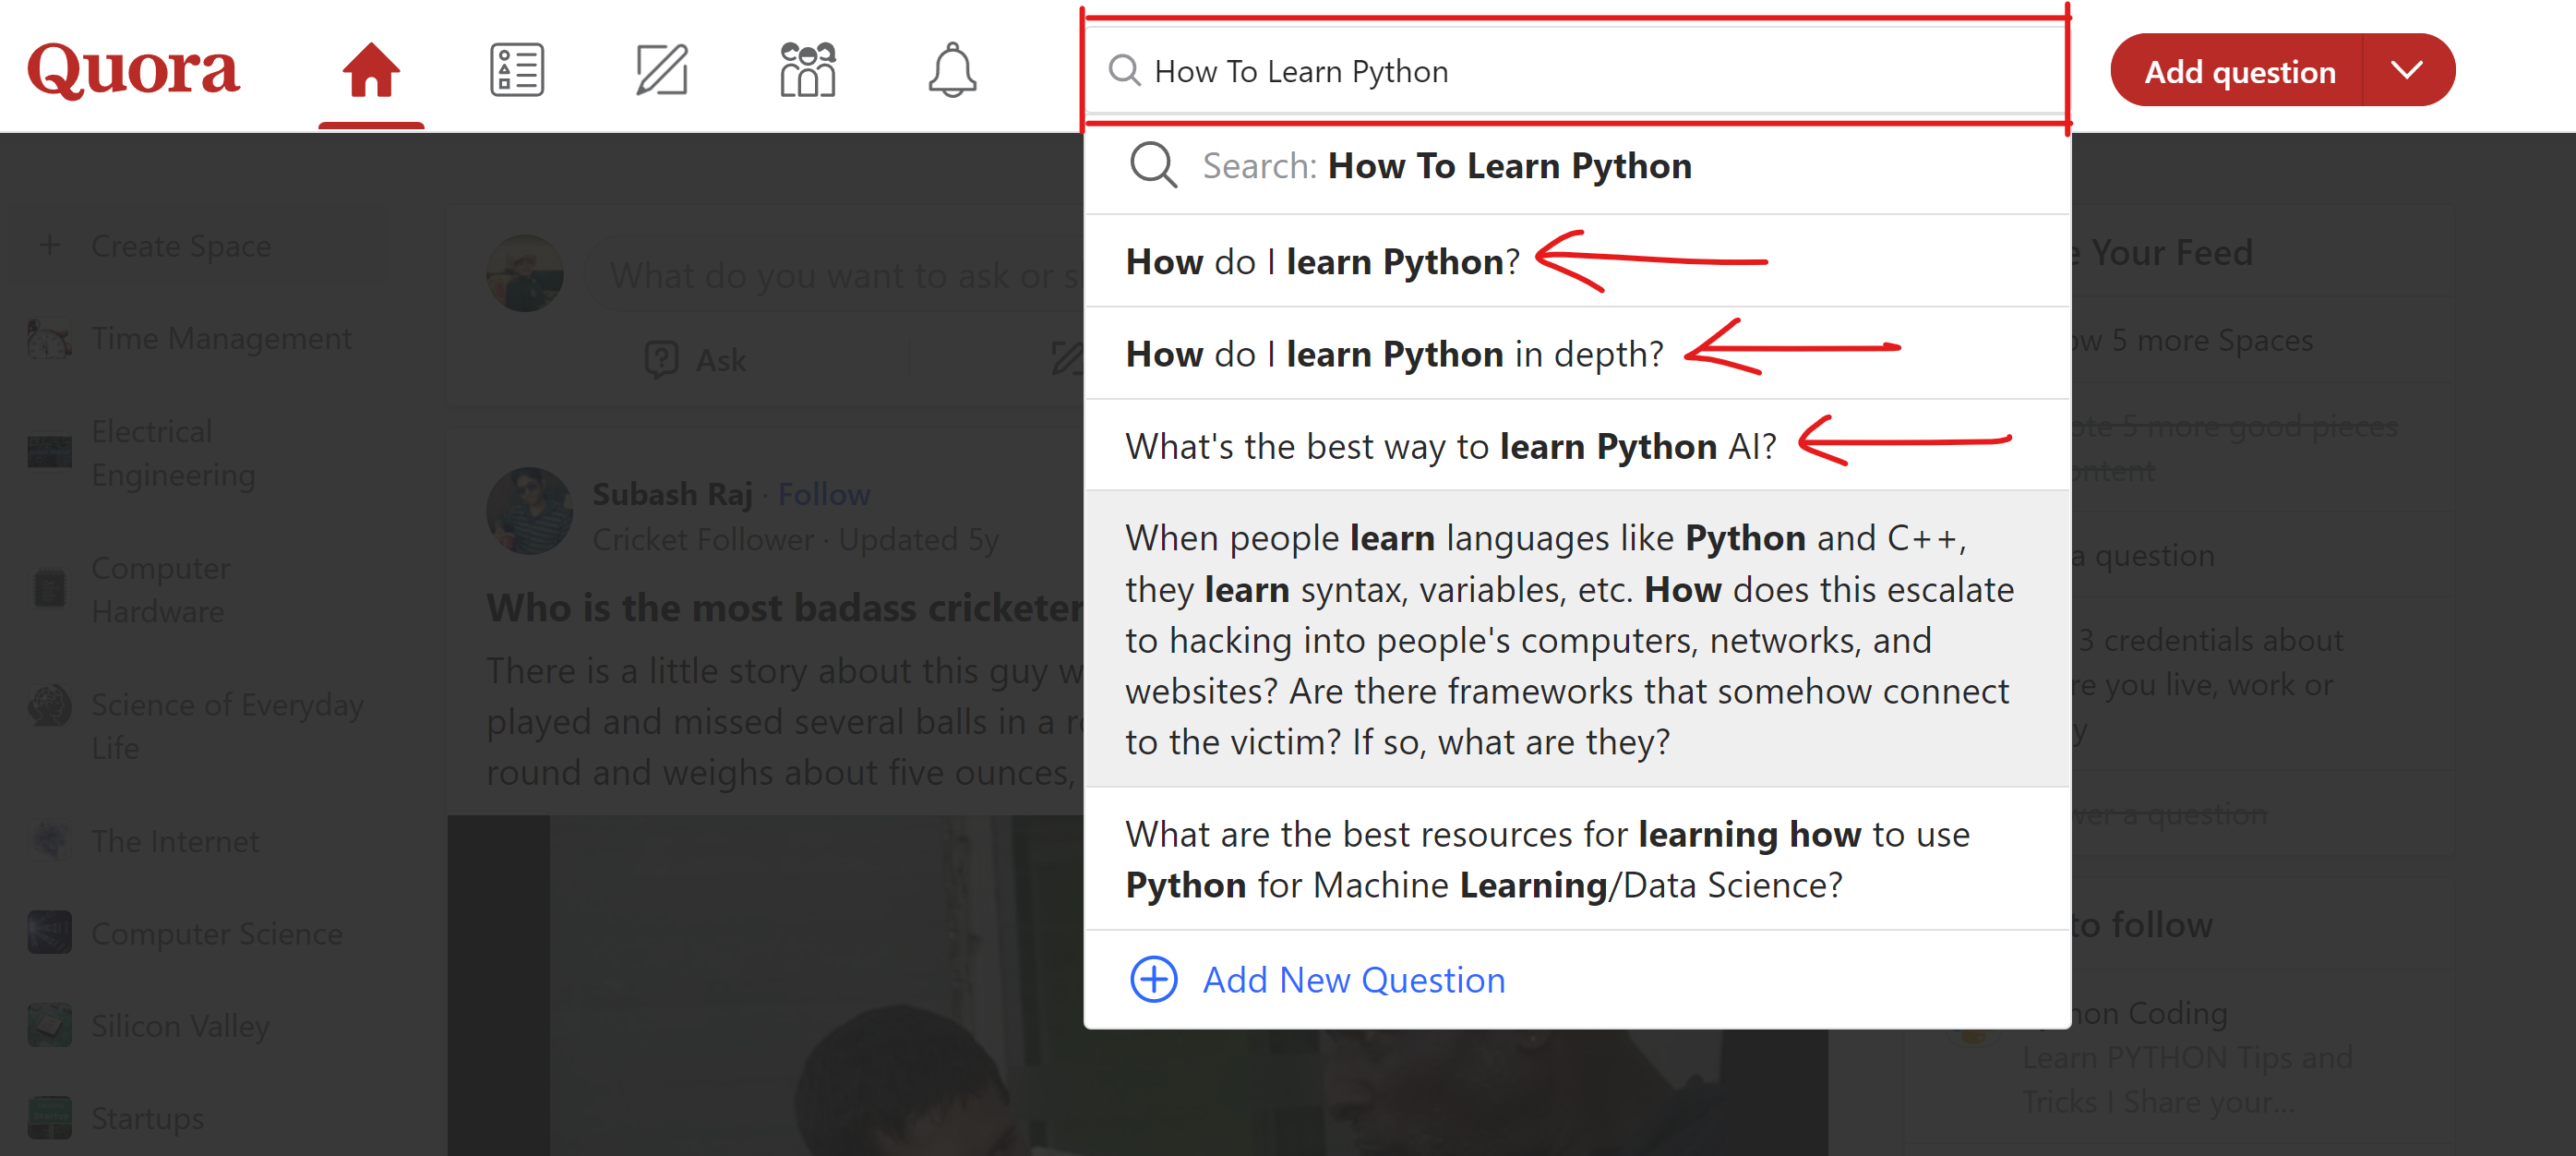

Pretrained Model List: https://www.sbert.net/docs/pretrained_models.html

In [1]:
# https://pytorch.org/get-started/locally/
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.7 MB/s 
     |████████████████████████████████| 5.8 MB 67.3 MB/s 
     |████████████████████████████████| 1.3 MB 61.3 MB/s 
     |████████████████████████████████| 182 kB 78.2 MB/s 
     |████████████████████████████████| 7.6 MB 62.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=f2ecd365be8f790e6ea0027c5dc482f7b281301dac633efb6f0c53fcbe54c9c3
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
import torch
torch.__version__

'1.13.0+cu116'

In [3]:
from sentence_transformers import SentenceTransformer, util
import os
import time
import pandas as pd


In [4]:
df = pd.read_csv('http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv', sep='\t', nrows=20000)

In [5]:
df.shape

(20000, 6)

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
corpus_sentences = list(set(df['question1'].tolist() + df['question2'].tolist()))
len(corpus_sentences)

37766

In [8]:
model = SentenceTransformer('quora-distilbert-multilingual')

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/447 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [10]:
corpus_embeddings = model.encode(corpus_sentences, show_progress_bar=True, convert_to_tensor=True)

Batches:   0%|          | 0/1181 [00:00<?, ?it/s]

In [11]:
model._target_device

device(type='cuda')

In [12]:
corpus_embeddings = corpus_embeddings.to(model._target_device)

In [14]:
while True:
  query = input("Please enter a question: ")

  if query == 'n':
    break

  question_embedding = model.encode(query, convert_to_tensor=True)
  hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=5)
  hits = hits[0]
  print(hits)

  for hit in hits:
    print(hit['score'], ": ", corpus_sentences[hit['corpus_id']])

  print('\n\n\n\n')
  

Please enter a question: what is python
[{'corpus_id': 31340, 'score': 0.9261705279350281}, {'corpus_id': 35091, 'score': 0.9184616208076477}, {'corpus_id': 7124, 'score': 0.9140186309814453}, {'corpus_id': 20836, 'score': 0.9131043553352356}, {'corpus_id': 14747, 'score': 0.9106533527374268}]
0.9261705279350281 :  What are some cool python scripts?
0.9184616208076477 :  What is the difference between () and [] in Python?
0.9140186309814453 :  What are the differences between Python 1, 2, 3?
0.9131043553352356 :  The world's largest dinosaur discovered is a titanosaur. How big was his poop?
0.9106533527374268 :  What is the best beginner friendly book on python?





Please enter a question: how to learn python
[{'corpus_id': 17565, 'score': 0.9927080273628235}, {'corpus_id': 8446, 'score': 0.9891510605812073}, {'corpus_id': 29725, 'score': 0.9827979803085327}, {'corpus_id': 25248, 'score': 0.963792085647583}, {'corpus_id': 23116, 'score': 0.9635708928108215}]
0.9927080273628235 :  Wha